<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

In [15]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys
sys.path.append("../")

In [16]:
# Importamos las clases creadas para hace el EDA
from src import soporte_logistica_preprocesamiento as sl
from src import soporte_encoding_logistica as se
from src import soporte_encoding_logistica as sc
from src import  soporte_ajuste_logistica as sal


# Ignorar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [18]:
# cargamos el conjunto de datos con el que llevamos trabajando las últimas lecciones
df = pd.read_pickle("datos/financial_data.pkl").reset_index(drop=True)
df.head()

,customer_id,merchant_id,amount,is_fraudulent,card_type,location,customer_age,transaction_description,purchase_category_0.4798288508557457,purchase_category_0.48697758933979407,purchase_category_0.5053128689492326,purchase_category_0.5135460565924143,purchase_category_0.524609843937575,purchase_category_0.5295508274231678
0,0.60,-0.450980,0.160961,0,0.521611,0.497382,-0.038462,0.517857,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.74,0.058824,-0.601127,1,0.507631,0.529126,0.653846,0.536825,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.96,-0.294118,-0.730090,1,0.521611,0.600000,0.500000,0.506024,0.0,0.0,0.0,0.0,1.0,0.0
3,0.86,-0.254902,0.528558,1,0.504747,0.600000,0.576923,0.525765,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.32,0.647059,-0.603391,1,0.521611,0.497382,-0.307692,0.523810,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados.head()

,train,test
accuracy,0.552750,0.567500
precision,0.552703,0.567373
recall,0.552750,0.567500
f1,0.552691,0.567425
kappa,0.105314,0.133734


# Accuracy (Precisión):

Entrenamiento: 0.552750
Prueba: 0.567500

La precisión es la proporción de predicciones correctas sobre el total de predicciones. 
Una precisión del 55.27% en el conjunto de entrenamiento y del 56.75% en el de prueba indica que el modelo tiene un rendimiento bastante consistente, pero relativamente bajo en términos absolutos.

# Precision:

Entrenamiento: 0.552703
Prueba: 0.567373

La precisión se refiere a la proporción de verdaderos positivos entre todas las instancias clasificadas como positivas. Tenemos valores cercanos a la precisión general del modelo que  indican un equilibrio razonable en la clasificación de instancias positivas.

# Recall (Sensibilidad):

Entrenamiento: 0.552750
Prueba: 0.567500

El recall mide la proporción de verdaderos positivos que fueron correctamente identificados. 
Al igual que la precisión, estos valores indican un rendimiento consistente entre los conjuntos de entrenamiento y prueba.

# F1 Score:

Entrenamiento: 0.552691
Prueba: 0.567425

El F1 score es la media armónica entre precisión y recall, proporcionando una única métrica de rendimiento. 

# Kappa:

Entrenamiento: 0.105314
Prueba: 0.133734

El coeficiente kappa mide la concordancia entre las predicciones del modelo y las etiquetas verdaderas, corrigiendo por la concordancia aleatoria. Un valor de kappa cercano a 0.1 indica que el modelo tiene una baja concordancia más allá de lo que se esperaría por azar, sugiriendo que el modelo no está mejorando significativamente sobre una clasificación aleatoria.(Basicamente tenemos un modelo aleatorio)




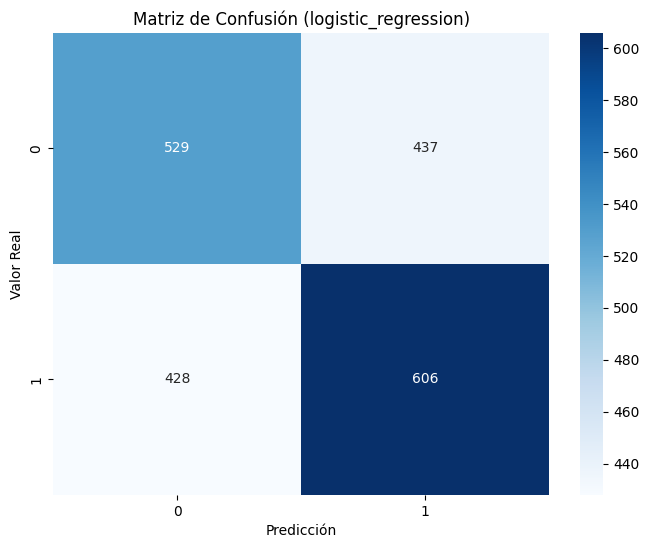

In [20]:
logistica.plot_matriz_confusion("logistic_regression")

**Interpretación de la gráfica**

Este tipo de matriz la vamos a utilizar para evaluar el rendimiento de un modelo de clasificación, mostrando el número de predicciones correctas e incorrectas, desglosadas por clase.

### Interpretación:

- **Verdaderos Negativos (TN)** (Predicciones correctas de la clase 0): El valor **529** en la celda superior izquierda indica que el modelo predijo correctamente que **529** instancias eran de la clase 0.

- **Falsos Positivos (FP)** (Predicciones incorrectas de la clase 0): El valor **437** en la celda superior derecha muestra que el modelo predijo incorrectamente que **437** instancias pertenecían a la clase 1 cuando en realidad eran de la clase 0.

- **Falsos Negativos (FN)** (Predicciones incorrectas de la clase 1):  El valor **428** en la celda inferior izquierda indica que el modelo predijo incorrectamente que **428** instancias pertenecían a la clase 0 cuando en realidad eran de la clase 1.

- **Verdaderos Positivos (TP)** (Predicciones correctas de la clase 1): El valor **606** en la celda inferior derecha indica que el modelo predijo correctamente que **606** instancias pertenecían a la clase 1.

En general podemos concluir que:

- El modelo es bastante preciso en general, ya que la mayoría de las predicciones están en las celdas de verdaderos positivos (606) y verdaderos negativos (529), lo que significa que está clasificando correctamente la mayor parte de las instancias.
  
- Hay **437 falsos positivos** y **428 falsos negativos**, lo que indica que el modelo a veces confunde las clases, pero estos valores no son tan altos en comparación con las predicciones correctas.

</div>


In [21]:
# llamamos al método para calcular las métricas del modelo
logistica.calcular_metricas("logistic_regression")

,train,test
accuracy,0.552750,0.567500
precision,0.552703,0.567373
recall,0.552750,0.567500
f1,0.552691,0.567425
kappa,0.105314,0.133734
auc,0.568656,0.587808


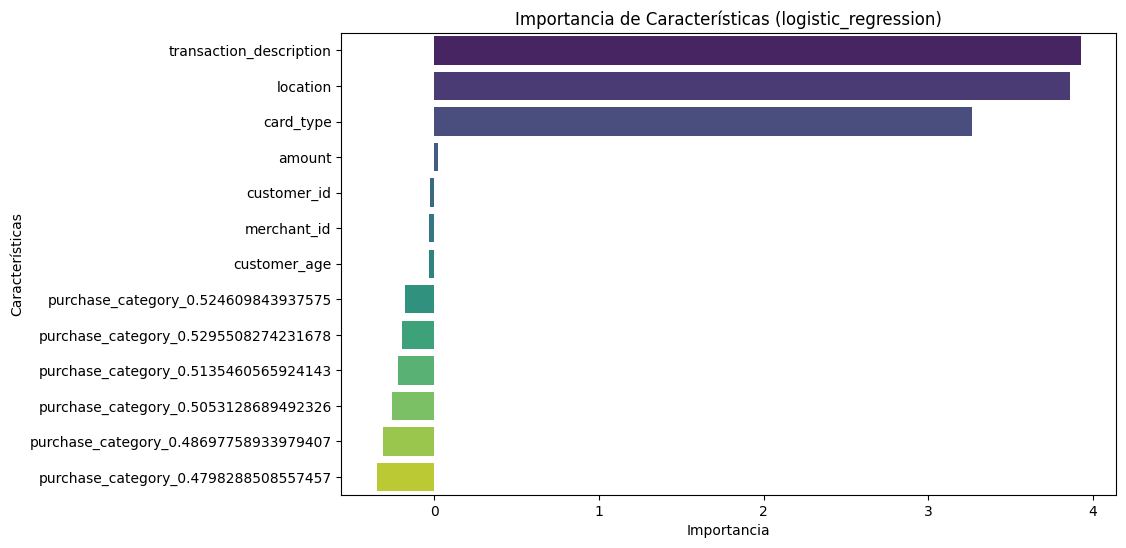

In [22]:
# Mostramos la importancia de los predictores en el modelo regresión logística
logistica.importancia_predictores(modelo_nombre ='logistic_regression')


En este modelo de **regresión logística**, transiccion description, localition y card_type tienen un impacto positivo importante en la probabilidad del es_Fraudulento . El purchase catgory influye de manera negativa en nuestro es_fraudulento.